# Intro

In [5]:
import spacy

%load_ext nb_black

nlp = spacy.load("en_core_web_sm")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [6]:
# Process sentences 'Hello, world. Antonio is learning Python.' using spaCy
doc = nlp(u"Hello, world. Antonio is learning Python.")

<IPython.core.display.Javascript object>

## Get tokens and sentences

#### What is a Token?
A token is a single chopped up element of the sentence, which could be a word or a group of words to analyse. The task of chopping the sentence up is called "tokenisation".

Example: The following sentence can be tokenised by splitting up the sentence into individual words.

	"Antonio is learning Python!"
	["Antonio","is","learning","Python!"]

In [7]:
# Get first token of the processed document
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)

Hello
Hello, world.
Antonio is learning Python.


<IPython.core.display.Javascript object>

## Part of speech tags

#### What is a Speech Tag?
A speech tag is a context sensitive description of what a word means in the context of the whole sentence.
More information about the kinds of speech tags which are used in NLP can be [found here](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

Examples:

1. CARDINAL, Cardinal Number - 1,2,3
2. PROPN, Proper Noun, Singular - "Jan", "Javier", "Antonio", "Italy"
3. INTJ, Interjection - "Ohhhhhhhhhhh"

In [10]:
# For each token, print corresponding part of speech tag
for word in doc:
    print("{} - {}".format(word, word.pos_))

Hello - INTJ
, - PUNCT
world - NOUN
. - PUNCT
Antonio - PROPN
is - AUX
learning - VERB
Python - PROPN
. - PUNCT


<IPython.core.display.Javascript object>

In [11]:
from spacy import displacy

<IPython.core.display.Javascript object>

In [12]:
displacy.serve(doc, style='dep')



/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/spacy/displacy/__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


<IPython.core.display.Javascript object>

In [13]:
displacy.render(doc, style = "ent",jupyter = True)


<IPython.core.display.Javascript object>

We have said that dependency structures are represented by directed graphs that satisfy the following constraints:

1. There is a single designated root node that has no incoming arcs.

2. With the exception of the root node, each vertex has exactly one incoming arc.

3. There is a unique path from the root node to each vertex in V.

You can inspect the head of each token by invoking the `.head` attribute of a spaCy token:


In [14]:
doc[2]

world

<IPython.core.display.Javascript object>

In [15]:
doc[2].head

Hello

<IPython.core.display.Javascript object>

So how would you search for the root?

Since there is a unique path from the root node to each vertex in V, there's only one root node that has no incoming arcs, we can search for the token which have as head itself!

In [16]:
for token in doc:
    if token.head == token:
        print(token)

Hello
learning


<IPython.core.display.Javascript object>

As expected, since there were two sentences in the doc, we got two roots.

We can also build a function that, given a spaCy token, gives the path till the root:

In [43]:
# Define a function to find the path to the root of each word in a sentence
def path_to_the_root(token):
    if token.head == token:
        return doc[0]
    else:
        print("{} -> {}".format(token, token.head))

<IPython.core.display.Javascript object>

In [44]:
path_to_the_root(doc[4])

Antonio -> learning


<IPython.core.display.Javascript object>

## Embeddings 

An embedding is a fixed sizes numerical vector that attempts to encode some semantic meaning of the word or sentence it is encoding. The distributional hypothesis is usually the concept behind most embeddings. This hypothesis states that words which often have the same neighboring words tend to be semantically similar. For example if 'football' and 'basketball' usually appear close the word 'play' we assume that they will be semantically similar. An algorithm that is based on this concept is Word2Vec. A common way of obtaining sentence embeddings is to average the word embeddings inside the sentence and use that average as the representation of the whole sentence. 

- In spacy every token has its embedding.
- It is under the attribute 'vector'.
- In spacy embeddings are of size 96 or 128.


Obtain the embeddings of all the tokens.

In [34]:
tk = doc.vector
tk

array([-0.05821817, -0.18020257,  0.10523587,  0.39725903, -0.1576159 ,
        0.16165501, -0.24342683, -0.30226365, -0.40438214, -0.08270919,
        0.10653582, -0.05833106, -0.19765003,  0.01793742, -0.25426757,
       -0.27338657,  0.20619781, -0.4867543 , -0.35758156, -0.31841385,
        0.00943076, -0.06545835, -0.46947438,  0.15634257,  0.04276362,
        0.21236801,  0.0324796 , -0.15722741, -0.06621625, -0.07640035,
       -0.2082676 , -0.04191216,  0.02580742, -0.10939704, -0.04951378,
        0.657238  , -0.08566196,  0.00651892,  0.12388028,  0.03668561,
       -0.44470325, -0.04624726, -0.0292111 ,  0.9436601 , -0.2525167 ,
       -0.05915495,  0.23177327,  0.16720207, -0.53614473, -0.05046161,
       -0.07531057,  0.19994767,  0.19862555,  0.01607097, -0.23917924,
        0.1337413 , -0.09497789,  0.70363975,  0.08100916,  0.08079899,
        0.5718703 ,  0.32510546,  0.3239106 , -0.18404236, -0.42357054,
        0.28602266, -0.41369948, -0.12242226,  0.48167017, -0.07

<IPython.core.display.Javascript object>

In [35]:
tk.shape

(96,)

<IPython.core.display.Javascript object>

## Semantic similarity 

To compute the semantic similarity between two sentences, $u$ and $v$, we measure the cossine similarity between the two sentence embeddings. The formula is as follows:

$sim(u, v) = \frac{u \cdot v}{||u|| ||v||} $


Use the following formula to get the semantic similarity betwen the words in doc.
Feel free to test it between differente words too

In [54]:
def semantic_sim(u,v):
    for i in doc:
        print(i)
    return i

semantic_sim(u,v)



# u = nlp("I like u")
# v = nlp("I like v")
# u_v = u.similarity(v)
# v_u = v.similarity(u)
# assert u_v == v_u

NameError: name 'u' is not defined

<IPython.core.display.Javascript object>

# Pride and Prejudice analysis

We would like to:

- Extract the names of all the characters from the book (e.g. Elizabeth, Darcy, Bingley)
- Visualize characters' occurences with regards to relative position in the book
- Authomatically describe any character from the book
- Find out which characters have been mentioned in a context of marriage
- Build keywords extraction that could be used to display a word cloud (example)

To load the text file, it is convinient to decode using the utf-8 standard:

In [37]:
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as file:
        return file.read()

<IPython.core.display.Javascript object>

### Process full text

In [40]:
text = read_file("data/pride_and_prejudice.txt")
# Process the text
processed_text = nlp(text)

<IPython.core.display.Javascript object>

In [42]:
# How many sentences are in the book (Pride & Prejudice)?
# sents => Iterate over the sentences in the documen
# set_ents => Set the named entities in the document.
# ents => A list of strings, of the same length of words, to assign the token-based IOB tag. Defaults to None.
sentences = [s for s in processed_text.sents]
print(len(sentences))
print(len(list(processed_text.sents)))
# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
print(sentences[10:20])

6873
6873
[My dear Mr. Bennet," said his lady to him one day, "have you heard that
Netherfield Park is let at last?", 

Mr. Bennet replied that he had not., 

", But it is," returned she; "for Mrs. Long has just been here, and she
told me all about it.", 

Mr. Bennet made no answer., 

"Do you not want to know who has taken it?", cried his wife impatiently., 

", _You_ want to tell me, and I have no objection to hearing it.", 

This was invitation enough.]


<IPython.core.display.Javascript object>

## Find all the personal names

[Hint](# "List doc.ents and check ent.label_")

In [49]:
# Extract all the personal names from Pride & Prejudice and count their occurrences.
# Expected output is a list in the following form: [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266) ...].

from collections import Counter, defaultdict


def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.

    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """

    characters = Counter()
    # your code here
    for i in doc.ents:
        if i.label_ == "PERSON":
            characters[i.lemma_] += 1

    return characters.most_common()


print(find_character_occurences(processed_text)[:20])

[('Elizabeth', 624), ('Darcy', 327), ('Jane', 288), ('Bennet', 237), ('Bingley', 188), ('Collins', 179), ('Wickham', 118), ('Lizzy', 94), ('Gardiner', 92), ('Lady Catherine', 89), ('Netherfield', 46), ('Fitzwilliam', 36), ('William', 34), ('Mary', 31), ('Hurst', 30), ('Lucas', 26), ('Phillips', 26), ('Project Gutenberg-tm', 23), ('Catherine', 20), ('Miss Bennet', 20)]


<IPython.core.display.Javascript object>

## Plot characters personal names as a time series 

In [47]:
# Matplotlib Jupyter HACK
# %matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

We can investigate where a particular entity occurs in the text. We can do it just accessing the `.start` attribute of an entity:

[Hint](# "ent.start")

In [50]:
# List all the start positions of person entities
for i in processed_text.ents:
    if i.label_ == "PERSON":
        print(i.start)

10
74
128
136
228
245
255
275
293
355
358
406
417
515
647
746
793
795
859
908
922
944
997
1012
1181
1285
1296
1371
1376
1393
1422
1438
1452
1496
1519
1609
1622
1649
1701
1713
1787
1835
1901
1927
1969
2102
2186
2310
2370
2393
2425
2475
2485
2554
2580
2610
2613
2709
2733
2762
2812
2819
2855
2933
2953
2996
3008
3079
3167
3232
3239
3244
3317
3342
3370
3531
3673
3751
3757
3762
3818
3828
3833
3850
3870
3872
3877
3884
3896
3957
4038
4070
4091
4146
4188
4225
4234
4242
4251
4364
4376
4416
4432
4533
4535
4552
4622
5005
5039
5249
5284
5384
5400
5430
5589
5603
5656
5730
5789
5805
5848
5898
6078
6099
6126
6185
6194
6202
6228
6278
6293
6305
6313
6359
6431
6440
6474
6510
6551
6559
6578
6606
6612
6668
6700
6731
6736
6755
6808
6891
6921
7063
7188
7201
7212
7215
7257
7270
7298
7350
7403
7443
7692
7746
7788
7844
7890
8050
8089
8261
8268
8293
8524
8541
8570
8648
8664
8685
8710
8759
8771
8853
8883
8972
9005
9049
9073
9135
9172
9181
9198
9258
9300
9403
9445
9470
9503
9513
9567
9596
9636
9657
9664
9688
9739


<IPython.core.display.Javascript object>

So we can create a function that stores all the offsets of every character:
   
   
[Hint](# "Create a dictionary with the lowered lemmas [ent.lemma_.lower()] and associate a list of all the ent.starts")

In [51]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.

def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """
            
    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            character_offsets[ent.lemma_.lower()].append(ent.start)

    return dict(character_offsets)


character_occurences = get_character_offsets(processed_text)

<IPython.core.display.Javascript object>

In [43]:
character_occurences

{'jane austen': [10, 74, 136, 155588],
 'prejudice': [70],
 'anonymous volunteers \n\n\n\n\n\n pride and': [128],
 'bennet': [228,
  255,
  293,
  515,
  1012,
  1181,
  1285,
  1496,
  1519,
  1713,
  1835,
  2102,
  2186,
  2370,
  2393,
  2580,
  2613,
  2709,
  2762,
  3317,
  3601,
  3957,
  4038,
  4376,
  5848,
  6099,
  6185,
  6360,
  7201,
  10191,
  10729,
  10863,
  11037,
  11070,
  11274,
  11425,
  11585,
  11748,
  15473,
  15502,
  15623,
  15754,
  16235,
  16294,
  17213,
  17578,
  22708,
  23297,
  23510,
  23629,
  23972,
  24027,
  24640,
  25088,
  25165,
  25506,
  25567,
  25645,
  25720,
  26012,
  26126,
  26466,
  26566,
  26642,
  26942,
  26955,
  26979,
  27046,
  27387,
  27450,
  27601,
  27626,
  27704,
  27779,
  29054,
  29186,
  34154,
  34208,
  34231,
  39525,
  40029,
  40744,
  41185,
  41260,
  41330,
  41423,
  41525,
  41741,
  42045,
  44078,
  44217,
  44435,
  44473,
  44521,
  44579,
  44733,
  44851,
  44944,
  44973,
  45076,
  45350,


[Hint](# "Use the character offsets for each character as x")

In [55]:
# Plot the histogram of the character occurrences in the whole text
NUM_BINS = 20

def plot_character_hist(character_offsets, character_label, cumulative=False):
    x = character_offsets[character_label]
    plt.figure()
    n, bins, patches = plt.hist(x, NUM_BINS, label=character_label, cumulative=cumulative)

<IPython.core.display.Javascript object>

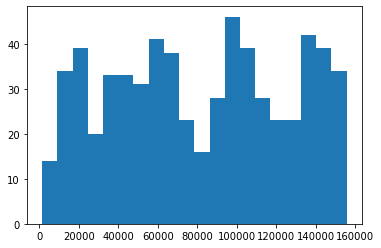

<IPython.core.display.Javascript object>

In [56]:
plot_character_hist(character_occurences, "elizabeth")

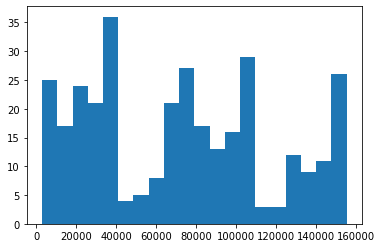

<IPython.core.display.Javascript object>

In [57]:
plot_character_hist(character_occurences, "darcy")

### Cumulative occurrences

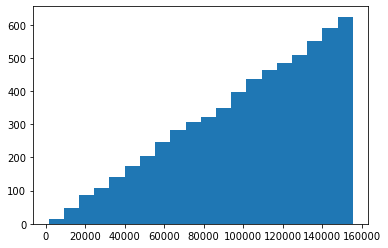

<IPython.core.display.Javascript object>

In [58]:
plot_character_hist(character_occurences, "elizabeth", cumulative=True)

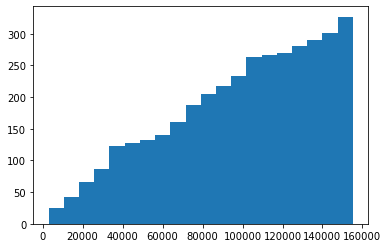

<IPython.core.display.Javascript object>

In [60]:
plot_character_hist(character_occurences, "darcy", cumulative=True)

### Spacy parse tree in action

[Hint](# "ent.subtree, token.pos_ == 'ADJ'") 

In [61]:
# Find words (adjectives) that describe Mr. Darcy.

def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """
    
    adjectives = []
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            for token in ent.subtree:
                if token.pos_ == 'ADJ': # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)
    
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
    
    return adjectives

print(get_character_adjectives(processed_text, 'darcy'))

['grave', 'late', 'late', 'late', 'late', 'intimate', 'confidential', 'present', 'superior', 'late', 'abominable', 'late', 'few', 'poor', 'last', 'little', 'disagreeable', 'clever', 'worth', 'sorry', 'unworthy', 'answerable', 'impatient', 'ashamed', 'kind', 'proud', 'punctual', 'engage', 'fond']


<IPython.core.display.Javascript object>

In [62]:
# Find words (adjectives) that describe Elizabeth.
def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """
    
    adjectives = []
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            for token in ent.subtree:
                if token.pos_ == 'ADJ': # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)
    
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
    
    return adjectives

print(get_character_adjectives(processed_text, 'elizabeth'))

['easy', 'unaffected', 'least', 'dear', 'young', 'dear', 'wilful', 'sighted', 'dear', 'dear', 'acute', 'dear', 'latter', 'favourite', 'irremediable', 'lovely', 'glad', 'surprised', 'surprised', 'pleased', 'watchful', 'satisfied', 'prepared', 'entertain', 'surprised', 'surprised', 'eager', 'shocked', 'blind', 'disappoint', 'distressed', 'delighted', 'rejoice', 'sensible', 'pleased', 'pleased', 'pleased', 'pleased', 'surprised', 'sorry', 'surprised', 'disgust', 'glad', 'pleased', 'determined', 'embarrassed', 'earnest']


<IPython.core.display.Javascript object>

For all the dependencies manual: https://nlp.stanford.edu/software/dependencies_manual.pdf

`acomp`: adjectival complement
*i.e.* an adjectival phrase which functions as the complement (like an object of the verb) e.g. "She looks very beautiful": *beautiful* is an adjectival complement of *looks*

`nsubj`: nominal subject
*i.e.* a noun phrase which is the syntactic subject of a clause. The head of this relation
might not always be a verb: when the verb is a copular verb, the root of the clause is the complement of
the copular verb, which can be an adjective or noun.
*e.g.* "Clinton defeated Dole". The relationship is *nsubj(defeated, Clinton)*

"The baby is cute". The relationship is *nsubj(cute, baby)*.

In the code, `.dep_`stands for syntactic dependency, *i.e.* the relation between tokens.

In [63]:
processed_text.ents[30].root.dep_

'pobj'

<IPython.core.display.Javascript object>

[Hint](# "ent.label_, ent.root.head.lemma_") 

In [64]:
# Find characters that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.

character_verb_counter = Counter()


for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "say":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "do":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "talk":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 



[('Elizabeth', 46), ('Bennet', 29), ('Jane', 15), ('Bingley', 12), ('Darcy', 11), ('Lizzy', 6), ('Lady Catherine', 5), ('Gardiner', 5), ('Fitzwilliam', 5), ('Lucas', 4)]
[('Elizabeth', 48), ('Bennet', 29), ('Jane', 15), ('Bingley', 15), ('Darcy', 14), ('Lizzy', 8), ('Gardiner', 8), ('Lady Catherine', 6), ('Fitzwilliam', 5), ('Lucas', 4)]
[('Elizabeth', 48), ('Bennet', 29), ('Jane', 16), ('Bingley', 15), ('Darcy', 14), ('Gardiner', 9), ('Lizzy', 8), ('Lady Catherine', 8), ('Fitzwilliam', 5), ('Lucas', 4)]


<IPython.core.display.Javascript object>

[Hint](# "ent.label_, ent.root.head.pos_") 

In [65]:
# Find 20 most used verbs
verb_counter = Counter()

for ent in processed_text.ents:
    if ent.label_ == "PERSON" and ent.root.head.pos_ == "VERB":
        verb_counter[ent.root.head.lemma_] += 1

print(verb_counter.most_common(20))

[('say', 162), ('be', 109), ('have', 59), ('see', 49), ('cry', 49), ('reply', 48), ('look', 28), ('come', 25), ('think', 23), ('make', 20), ('tell', 20), ('leave', 19), ('take', 18), ('go', 18), ('give', 18), ('do', 16), ('feel', 16), ('find', 15), ('marry', 15), ('hear', 14)]


<IPython.core.display.Javascript object>

In [70]:
# Create a dataframe with the most used verb and how many time a character used the verb

import pandas as pd
verb_characters = {}
verb_list = [verb[0] for verb in verb_counter.most_common(20)]
for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ in verb_list:
        verb = ent.root.head.lemma_
        person = ent.text
        if verb not in verb_characters:
            verb_characters[verb] = {person:1}
        else:
            if ent.text not in verb_characters[verb]:
                verb_characters[verb][person] = 1
            else:
                verb_characters[verb][person] += 1


<IPython.core.display.Javascript object>

In [71]:
verb_counter.most_common(20)

[('say', 162),
 ('be', 109),
 ('have', 59),
 ('see', 49),
 ('cry', 49),
 ('reply', 48),
 ('look', 28),
 ('come', 25),
 ('think', 23),
 ('make', 20),
 ('tell', 20),
 ('leave', 19),
 ('take', 18),
 ('go', 18),
 ('give', 18),
 ('do', 16),
 ('feel', 16),
 ('find', 15),
 ('marry', 15),
 ('hear', 14)]

<IPython.core.display.Javascript object>

In [67]:
df = pd.DataFrame(verb_characters).transpose().fillna(0)
df

""


<IPython.core.display.Javascript object>

In [68]:
# drop the less meaningful columns
df = df[df.columns[df.sum()>=10]].sort_index()
df

""


<IPython.core.display.Javascript object>

In [69]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df, annot=True, cmap='Blues')
df.style.background_gradient(cmap='Blues')


ModuleNotFoundError: No module named 'seaborn'

<IPython.core.display.Javascript object>